# Read data and data preprocessing

In [1]:
import pandas as pd
import numpy as np

# read 
df = pd.read_csv("Spotify_Dataset_V3.csv", delimiter=";")

In [2]:
df = df.drop(columns=['Song URL','# of Nationality','Nationality','Continent'])
print(df.shape)
df.head()

(651936, 16)


Rank            Title                     Artists        Date  \
0     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
1     1  Ella Baila Sola  Eslabon Armado, Peso Pluma  29/05/2023   
2     2   WHERE SHE GOES                   Bad Bunny  29/05/2023   
3     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   
4     3  La Bebe - Remix       Yng Lvcas, Peso Pluma  29/05/2023   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
1         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
4         0.812   0.479   -5678.0        0.333         0.213   

   Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0             0.000    0.834    Artist 1  Eslabon Armado             200   
1             0.000    0.834    Artist 2      Peso Pluma             200   
2             0.629    0.234    Artist 1       Bad Bunny             199   
3             0.000    0.559    Artist 1       Yng Lvcas             198   
4             0.000    0.559    Artist 2      Peso Pluma             198   

   Points (Ind for each Artist/Nat)                      id  
0                             100.0  3qQbCzHBycnDpGskqOWY0E  
1                             100.0  3qQbCzHBycnDpGskqOWY0E  
2                             199.0  7ro0hRteUMfnOioTFI5TG1  
3                              99.0  2UW7JaomAMuX9pZrjVpHAU  
4                              99.0  2UW7JaomAMuX9pZrjVpHAU

## Select the columns to be deleted

In [3]:
columns_to_consider = ['id', 'Title', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

df = df.drop_duplicates(subset=columns_to_consider)
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
5          4              Cupid - Twin Ver.                 FIFTY FIFTY   
6          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
651930   196                  White Iverson                 Post Malone   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
2       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
3       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
5       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
6       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
651930  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
651931  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
651932  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
651933  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
651934  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
2                  0.629    0.234    Artist 1       Bad Bunny             199   
3                  0.000    0.559    Artist 1       Yng Lvcas             198   
5                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
6                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
651930             0.000    0.309    Artist 1     Post Malone               5   
651931             0.000    0.377    Artist 1       MiC LOWRY               4   
651932             0.004    0.883    Artist 1   Stevie Wonder               3   
651933             0.000    0.764    Artist 1      The Weeknd               2   
651934             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  
0                                  100.0  3qQbCzHBycnDpGskqOWY0E  
2                                  199.0  7ro0hRteUMfnOioTFI5TG1  
3                                   99.0  2UW7JaomAMuX9pZrjVpHAU  
5                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7  
6                                   98.0  6pD0ufEQq0xdHSsRbg9LBK  
...                                  ...                     ...  
651930                               5.0  6eT7xZZlB2mwyzJ2sUKG6w  
651931                               4.0  1sTUEdVO85YU8Ymk2jeAls  
651932                               3.0  5lXcSvHRVjQJ3LB2rLKQog  
651933                               2.0  3DX4Y0egvc0slLcLl31h2p  
651934                               1.0  2KpCpk6HjXXLb7nnXoXA5O  

[468746 rows x 16 columns]

## PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


# Select feature columns
features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

# Standardizing Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "d:\Program Files\anaconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\19093\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "d:\Program Files\anaconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "d:\Program Files\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 28: invalid start byte
d:\Program Files\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You

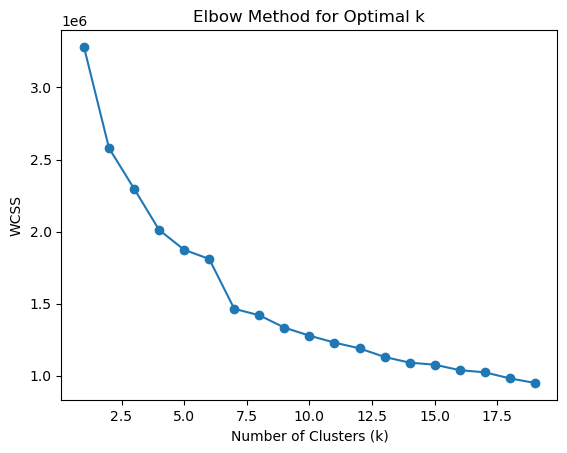

In [5]:
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Genre'] = kmeans.fit_predict(features_scaled)

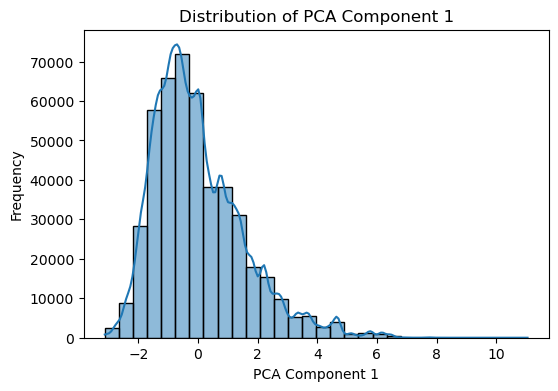

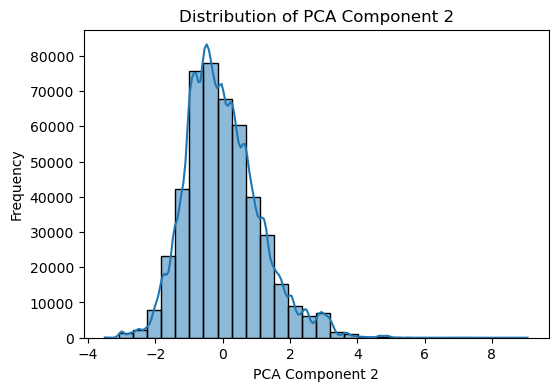

In [6]:
# Use PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(features_pca, columns=['PCA Component 1', 'PCA Component 2'])
for column in pca_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(pca_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Using Gaussian distribution to filter discrete values

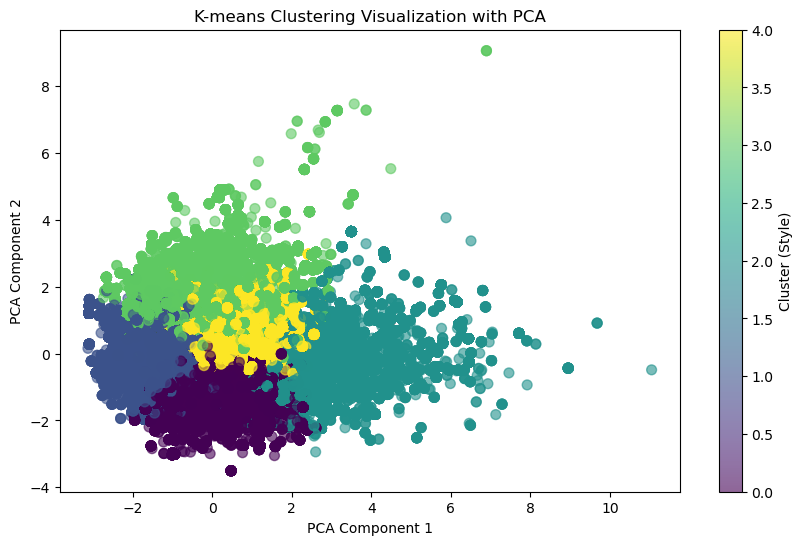

(459485, 17)


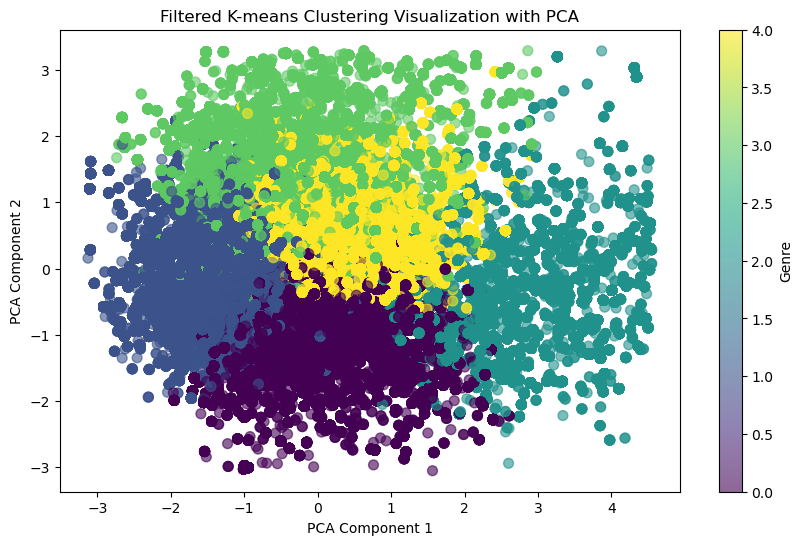

In [7]:
# Draw a scatter plot of the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['Genre'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster (Style)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Visualization with PCA')
plt.show()


# Calculate the mean and standard deviation of the features after dimensionality reduction
mean_pca = np.mean(features_pca, axis=0)
std_pca = np.std(features_pca, axis=0)

# Set a threshold (e.g. 3 standard deviations)
threshold = 3

# Calculate the z-score for each point
z_scores = np.abs((features_pca - mean_pca) / std_pca)

# Filter out discrete points
outliers = (z_scores > threshold).any(axis=1)
non_outliers = ~outliers
filtered_data = features_pca[~outliers]
filtered_clusters = df['Genre'][non_outliers]
df = df[non_outliers].reset_index(drop=True)
print(df.shape)

# Visualize the data after removing discrete points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data[:, 0], filtered_data[:, 1], c=filtered_clusters, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Genre')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Filtered K-means Clustering Visualization with PCA')
plt.show()

In [8]:
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
459480   196                  White Iverson                 Post Malone   
459481   197                        Oh Lord                   MiC LOWRY   
459482   198  Superstition - Single Version               Stevie Wonder   
459483   199                        Secrets                  The Weeknd   
459484   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
2       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
3       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
4       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
459480  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
459481  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
459482  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
459483  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
459484  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
1                  0.629    0.234    Artist 1       Bad Bunny             199   
2                  0.000    0.559    Artist 1       Yng Lvcas             198   
3                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
4                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
459480             0.000    0.309    Artist 1     Post Malone               5   
459481             0.000    0.377    Artist 1       MiC LOWRY               4   
459482             0.004    0.883    Artist 1   Stevie Wonder               3   
459483             0.000    0.764    Artist 1      The Weeknd               2   
459484             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  Genre  
0                                  100.0  3qQbCzHBycnDpGskqOWY0E      1  
1                                  199.0  7ro0hRteUMfnOioTFI5TG1      0  
2                                   99.0  2UW7JaomAMuX9pZrjVpHAU      3  
3                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7      4  
4                                   98.0  6pD0ufEQq0xdHSsRbg9LBK      0  
...                                  ...                     ...    ...  
459480                               5.0  6eT7xZZlB2mwyzJ2sUKG6w      4  
459481                               4.0  1sTUEdVO85YU8Ymk2jeAls      0  
459482                               3.0  5lXcSvHRVjQJ3LB2rLKQog      4  
459483                               2.0  3DX4Y0egvc0slLcLl31h2p      1  
459484                               1.0  2KpCpk6HjXXLb7nnXoXA5O      3  

[459485 rows x 17 columns]

In [9]:
# According to the analysis in our report, we give each cluster a corresponding 
# genre name based on the different musical characteristics of different clusters.
df = df.rename(columns={'Genre': 'Genre'})
genre_mapping = {
    0: 'Rock or Alternative',
    1: 'Dance or Electronic',
    2: 'Jazz or Classical',
    3: 'Hip-hop or Rap',
    4: 'Pop or R&B'
}
df['Genre'] = df['Genre'].replace(genre_mapping)

In [10]:
df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          2                 WHERE SHE GOES                   Bad Bunny   
2          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
3          4              Cupid - Twin Ver.                 FIFTY FIFTY   
4          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
459480   196                  White Iverson                 Post Malone   
459481   197                        Oh Lord                   MiC LOWRY   
459482   198  Superstition - Single Version               Stevie Wonder   
459483   199                        Secrets                  The Weeknd   
459484   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
2       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
3       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
4       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
459480  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
459481  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
459482  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
459483  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
459484  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  Points (Total)  \
0                  0.000    0.834    Artist 1  Eslabon Armado             200   
1                  0.629    0.234    Artist 1       Bad Bunny             199   
2                  0.000    0.559    Artist 1       Yng Lvcas             198   
3                  0.000    0.726    Artist 1     FIFTY FIFTY             197   
4                  0.000    0.562    Artist 1  Grupo Frontera             196   
...                  ...      ...         ...             ...             ...   
459480             0.000    0.309    Artist 1     Post Malone               5   
459481             0.000    0.377    Artist 1       MiC LOWRY               4   
459482             0.004    0.883    Artist 1   Stevie Wonder               3   
459483             0.000    0.764    Artist 1      The Weeknd               2   
459484             0.000    0.684    Artist 1           JAY-Z               1   

        Points (Ind for each Artist/Nat)                      id  \
0                                  100.0  3qQbCzHBycnDpGskqOWY0E   
1                                  199.0  7ro0hRteUMfnOioTFI5TG1   
2                                   99.0  2UW7JaomAMuX9pZrjVpHAU   
3                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4                                   98.0  6pD0ufEQq0xdHSsRbg9LBK   
...                                  ...                     ...   
459480                               5.0  6eT7xZZlB2mwyzJ2sUKG6w   
459481                               4.0  1sTUEdVO85YU8Ymk2jeAls   
459482                               3.0  5lXcSvHRVjQJ3LB2rLKQog   
459483                               2.0  3DX4Y0egvc0slLcLl31h2p   
459484                               1.0  2KpCpk6HjXXLb7nnXoXA5O   

                      Genre  
0       Dance or Electronic  
1       Rock or Alternative  
2            Hip-hop or Rap  
3                Pop or R&B  
4       Rock or Alternative  
...                     ...  
459480           Pop or R&B  
459481  Rock or Alternative  
459482           Pop or R&B  
459483  Dance or Electronic  
459484       H

# Use the SARIMA model to predict future music trends of different genres

### Use the first 80% of the dataset as the dataset and the last 20% as the validation set. Use Jazz or Classical to show the model training effect.

Training Mean Squared Error: 114318975.9079131
Validation Mean Squared Error: 94291571.27543911
Training R^2 Score: 0.7637291614746864
Validation R^2 Score: 0.6453192939240093


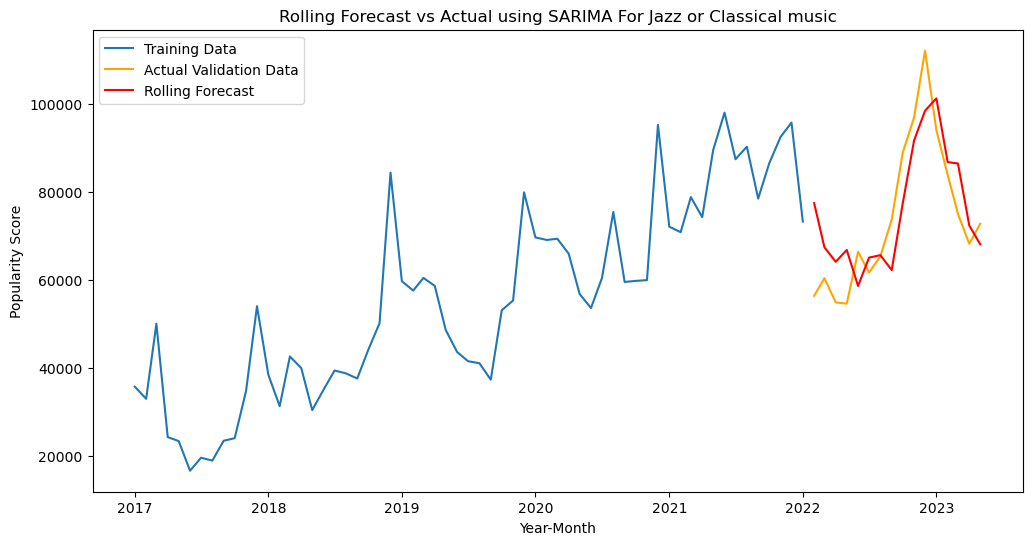

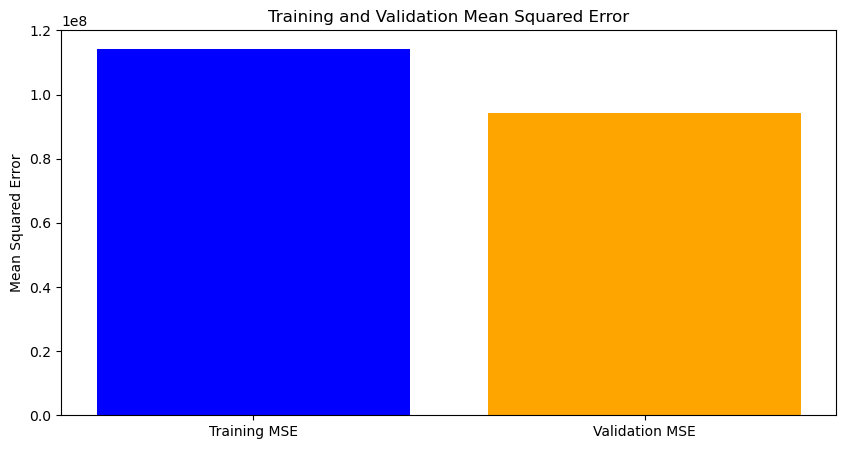

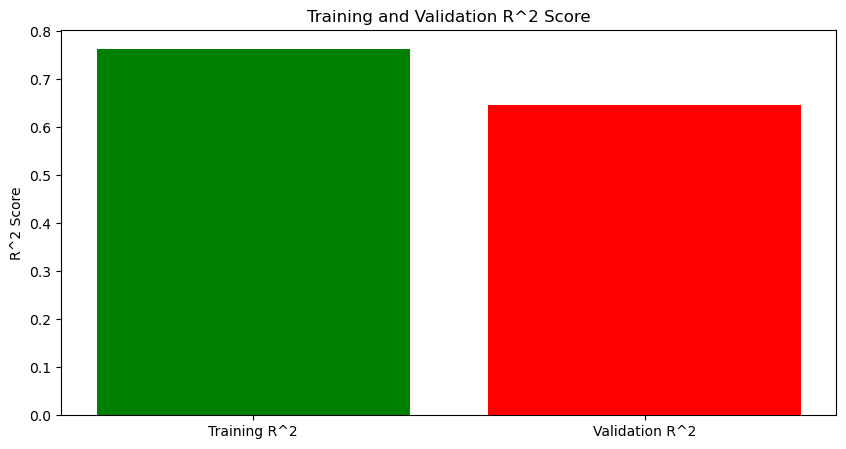

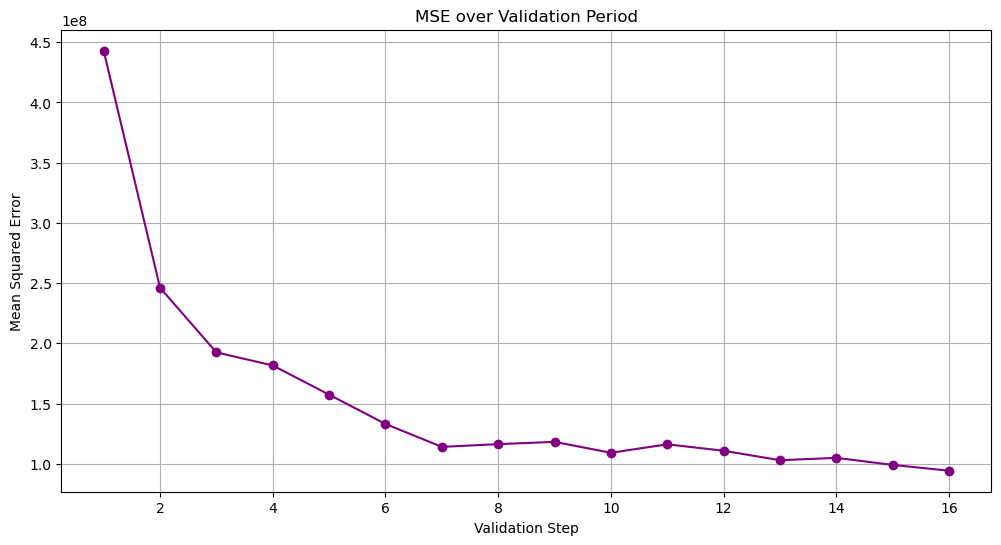

In [11]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Select one genre's trend as an example for SARIMA prediction (e.g., Genre Jazz or Classical)
genre_trend = genre_trends['Jazz or Classical']

# Split the data into training and validation sets (80% training, 20% validation)
train_size = int(len(genre_trend) * 0.8)
train_data = genre_trend[:train_size]
validation_data = genre_trend[train_size:]

# Rolling forecast with SARIMA and automatic parameter tuning
history = list(train_data)  # Start with the training data
predictions = []
mse_values = []

# Use rolling forecast to predict each point in the validation set
for t in range(len(validation_data)):
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                      error_action='ignore', suppress_warnings=True, 
                      stepwise=True)
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    # Forecast the next point
    forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
    predictions.append(forecast)
    # Add the actual value to history for the next iteration
    history.append(validation_data.iloc[t])
    # Calculate MSE for the current prediction
    mse = mean_squared_error(validation_data[:t + 1], predictions)
    mse_values.append(mse)

# Calculate training error and validation error
train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
train_mse = mean_squared_error(train_data[1:], train_predictions)
validation_mse = mean_squared_error(validation_data, predictions)

train_r2 = r2_score(train_data[1:], train_predictions)
validation_r2 = r2_score(validation_data, predictions)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {validation_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Validation R^2 Score: {validation_r2}")

# Convert PeriodIndex to datetime for plotting
train_data.index = train_data.index.to_timestamp()
validation_data.index = validation_data.index.to_timestamp()

# Visualize the rolling forecast results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Actual Validation Data', color='orange')
plt.plot(validation_data.index, predictions, label='Rolling Forecast', color='red')
plt.title('Rolling Forecast vs Actual using SARIMA For Jazz or Classical music')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

# Visualize training and validation errors
errors = [train_mse, validation_mse]
labels = ['Training MSE', 'Validation MSE']

plt.figure(figsize=(10, 5))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Validation Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize training and validation R^2 scores
r2_scores = [train_r2, validation_r2]
labels = ['Training R^2', 'Validation R^2']

plt.figure(figsize=(10, 5))
plt.bar(labels, r2_scores, color=['green', 'red'])
plt.title('Training and Validation R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

# Visualize MSE over the validation period
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='purple')
plt.title('MSE over Validation Period')
plt.xlabel('Validation Step')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


### The Training result of Dance or Electronic

d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\L

Training Mean Squared Error: 246420790.3058769
Validation Mean Squared Error: 469880172.7052399
Training R^2 Score: 0.6092972533519172
Validation R^2 Score: 0.37552895806827835


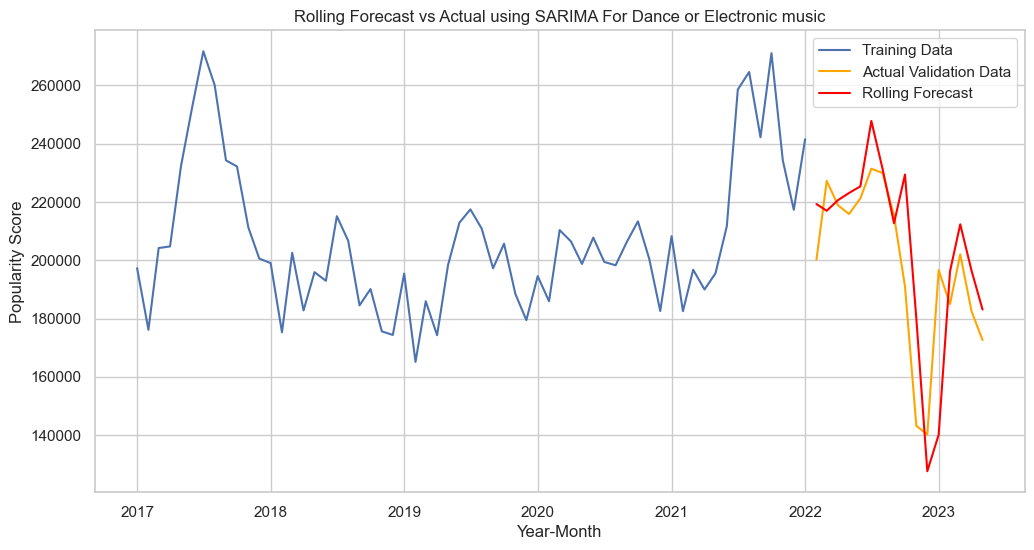

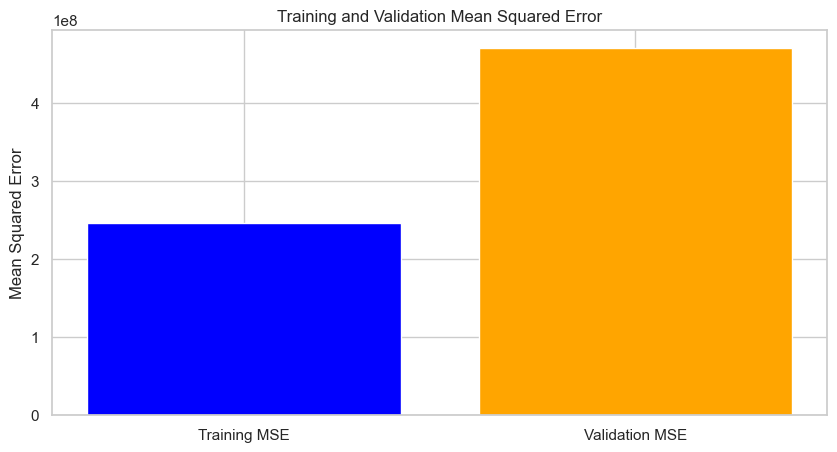

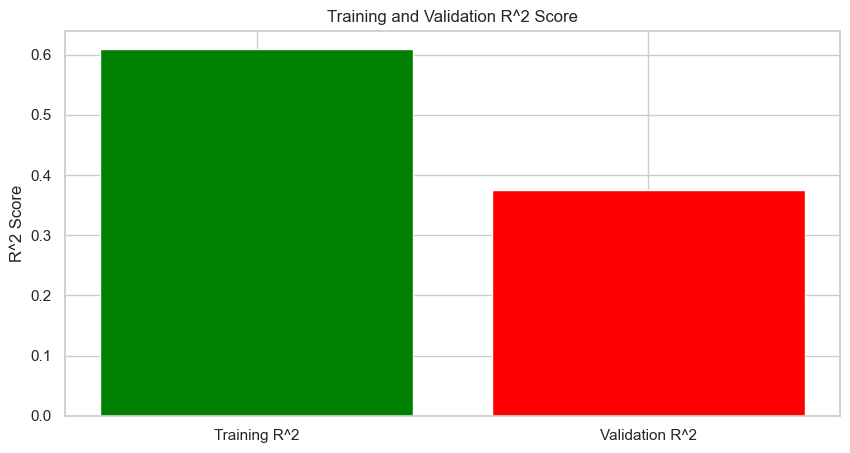

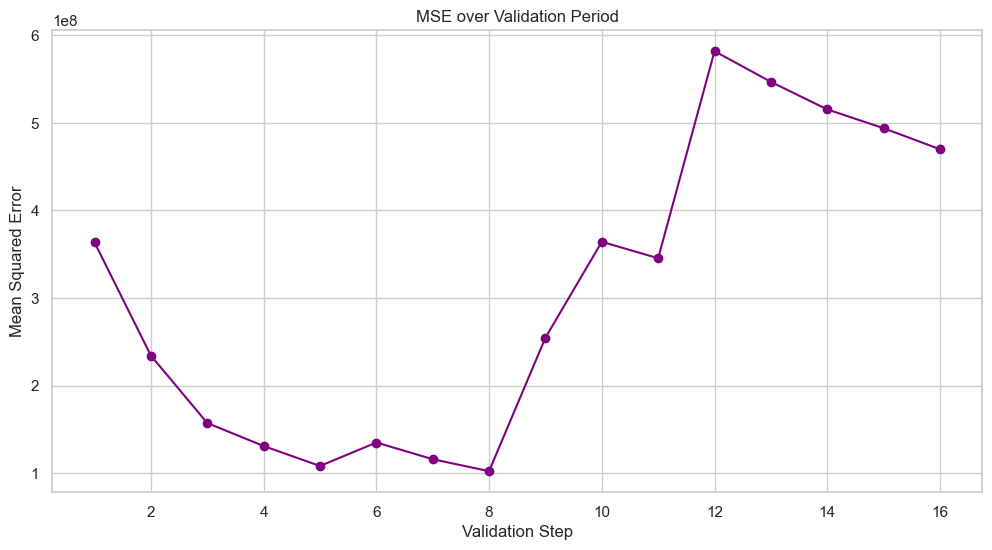

In [ ]:
# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Select one genre's trend as an example for SARIMA prediction
genre_trend = genre_trends['Dance or Electronic']

# Split the data into training and validation sets (80% training, 20% validation)
train_size = int(len(genre_trend) * 0.8)
train_data = genre_trend[:train_size]
validation_data = genre_trend[train_size:]

# Rolling forecast with SARIMA and automatic parameter tuning
history = list(train_data)  # Start with the training data
predictions = []
mse_values = []

# Use rolling forecast to predict each point in the validation set
for t in range(len(validation_data)):
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                      error_action='ignore', suppress_warnings=True, 
                      stepwise=True)
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    # Forecast the next point
    forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
    predictions.append(forecast)
    # Add the actual value to history for the next iteration
    history.append(validation_data.iloc[t])
    # Calculate MSE for the current prediction
    mse = mean_squared_error(validation_data[:t + 1], predictions)
    mse_values.append(mse)

# Calculate training error and validation error
train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
train_mse = mean_squared_error(train_data[1:], train_predictions)
validation_mse = mean_squared_error(validation_data, predictions)

train_r2 = r2_score(train_data[1:], train_predictions)
validation_r2 = r2_score(validation_data, predictions)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {validation_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Validation R^2 Score: {validation_r2}")

# Convert PeriodIndex to datetime for plotting
train_data.index = train_data.index.to_timestamp()
validation_data.index = validation_data.index.to_timestamp()

# Visualize the rolling forecast results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Actual Validation Data', color='orange')
plt.plot(validation_data.index, predictions, label='Rolling Forecast', color='red')
plt.title('Rolling Forecast vs Actual using SARIMA For Dance or Electronic music')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

# Visualize training and validation errors
errors = [train_mse, validation_mse]
labels = ['Training MSE', 'Validation MSE']

plt.figure(figsize=(10, 5))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Validation Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize training and validation R^2 scores
r2_scores = [train_r2, validation_r2]
labels = ['Training R^2', 'Validation R^2']

plt.figure(figsize=(10, 5))
plt.bar(labels, r2_scores, color=['green', 'red'])
plt.title('Training and Validation R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

# Visualize MSE over the validation period
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='purple')
plt.title('MSE over Validation Period')
plt.xlabel('Validation Step')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


### The training result of Hip-hop or Rap

d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\L

Training Mean Squared Error: 160031590.94749248
Validation Mean Squared Error: 150446864.45983547
Training R^2 Score: 0.6680560394413539
Validation R^2 Score: -0.17390479055574626


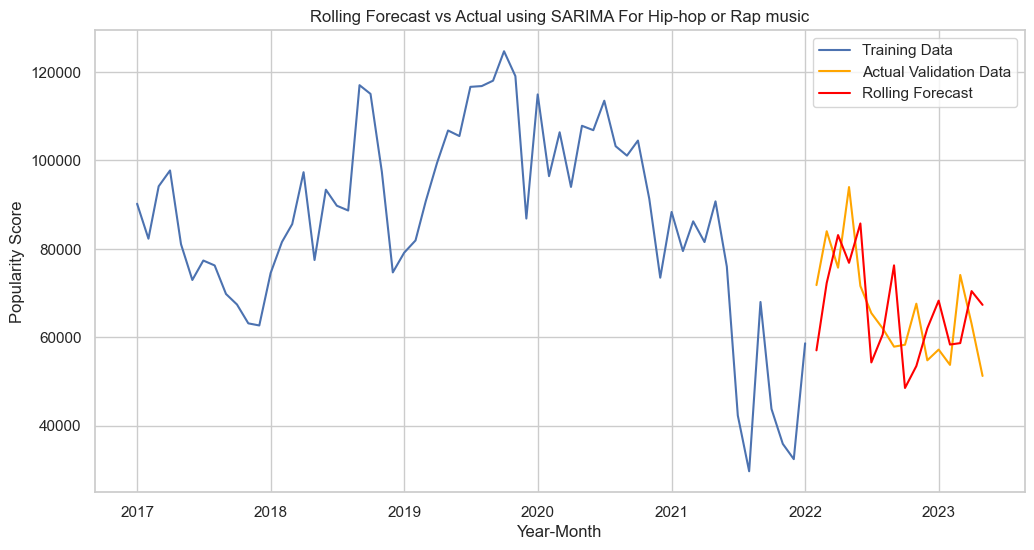

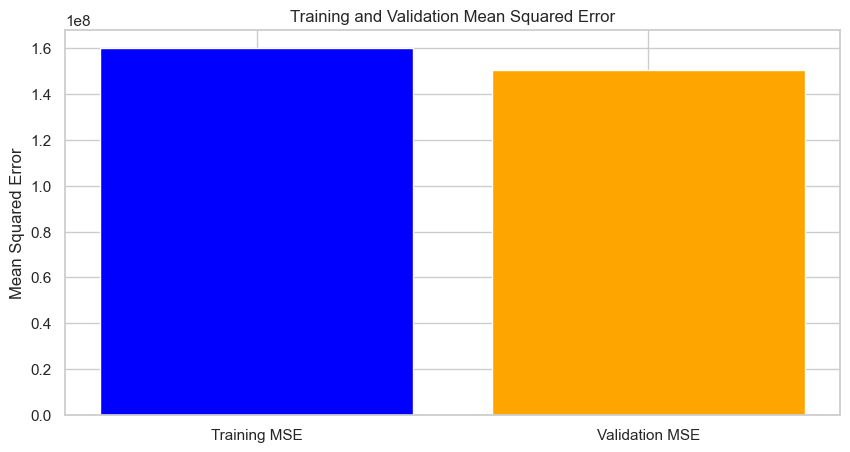

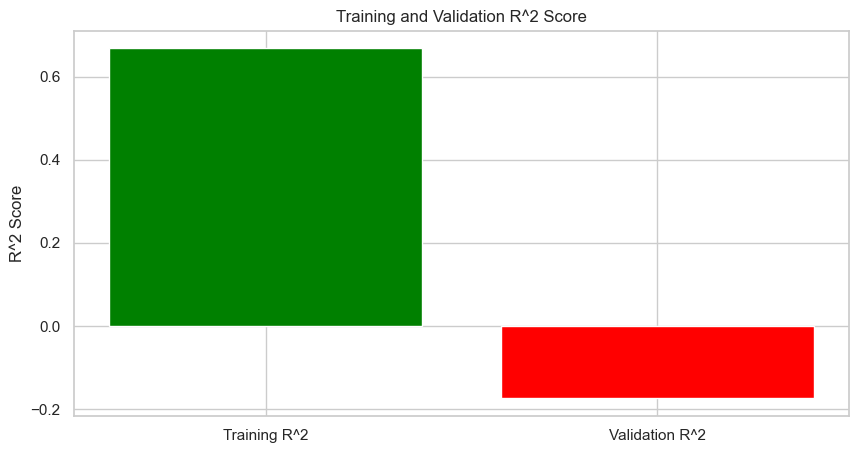

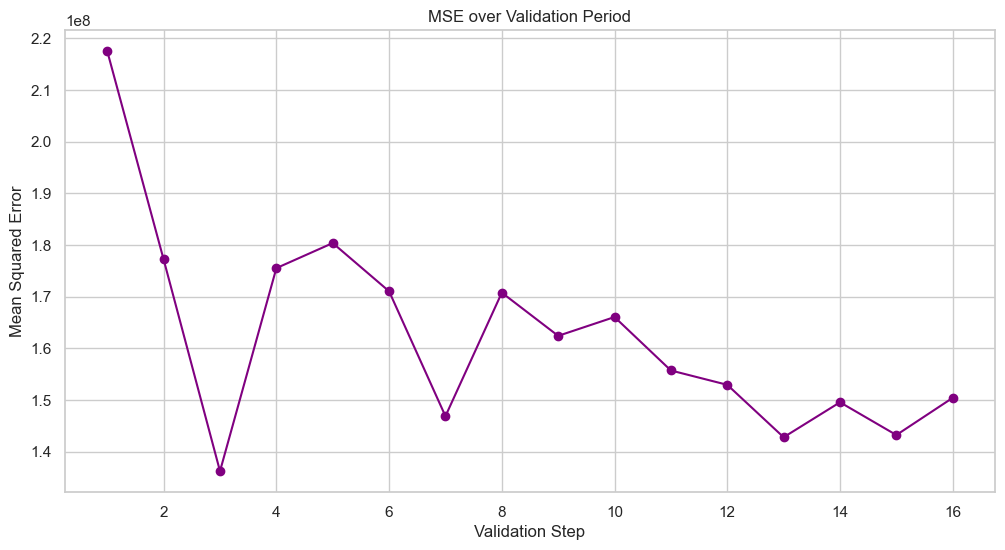

In [60]:
# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Select one genre's trend as an example for SARIMA prediction
genre_trend = genre_trends['Hip-hop or Rap']

# Split the data into training and validation sets (80% training, 20% validation)
train_size = int(len(genre_trend) * 0.8)
train_data = genre_trend[:train_size]
validation_data = genre_trend[train_size:]

# Rolling forecast with SARIMA and automatic parameter tuning
history = list(train_data)  # Start with the training data
predictions = []
mse_values = []

# Use rolling forecast to predict each point in the validation set
for t in range(len(validation_data)):
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                      error_action='ignore', suppress_warnings=True, 
                      stepwise=True)
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    # Forecast the next point
    forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
    predictions.append(forecast)
    # Add the actual value to history for the next iteration
    history.append(validation_data.iloc[t])
    # Calculate MSE for the current prediction
    mse = mean_squared_error(validation_data[:t + 1], predictions)
    mse_values.append(mse)

# Calculate training error and validation error
train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
train_mse = mean_squared_error(train_data[1:], train_predictions)
validation_mse = mean_squared_error(validation_data, predictions)

train_r2 = r2_score(train_data[1:], train_predictions)
validation_r2 = r2_score(validation_data, predictions)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {validation_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Validation R^2 Score: {validation_r2}")

# Convert PeriodIndex to datetime for plotting
train_data.index = train_data.index.to_timestamp()
validation_data.index = validation_data.index.to_timestamp()

# Visualize the rolling forecast results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Actual Validation Data', color='orange')
plt.plot(validation_data.index, predictions, label='Rolling Forecast', color='red')
plt.title('Rolling Forecast vs Actual using SARIMA For Hip-hop or Rap music')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

# Visualize training and validation errors
errors = [train_mse, validation_mse]
labels = ['Training MSE', 'Validation MSE']

plt.figure(figsize=(10, 5))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Validation Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize training and validation R^2 scores
r2_scores = [train_r2, validation_r2]
labels = ['Training R^2', 'Validation R^2']

plt.figure(figsize=(10, 5))
plt.bar(labels, r2_scores, color=['green', 'red'])
plt.title('Training and Validation R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

# Visualize MSE over the validation period
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='purple')
plt.title('MSE over Validation Period')
plt.xlabel('Validation Step')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### The training result of Pop or R&B

Training Mean Squared Error: 150190441.81227997
Validation Mean Squared Error: 280336555.70765984
Training R^2 Score: 0.38865438026898125
Validation R^2 Score: -0.1809258877267892


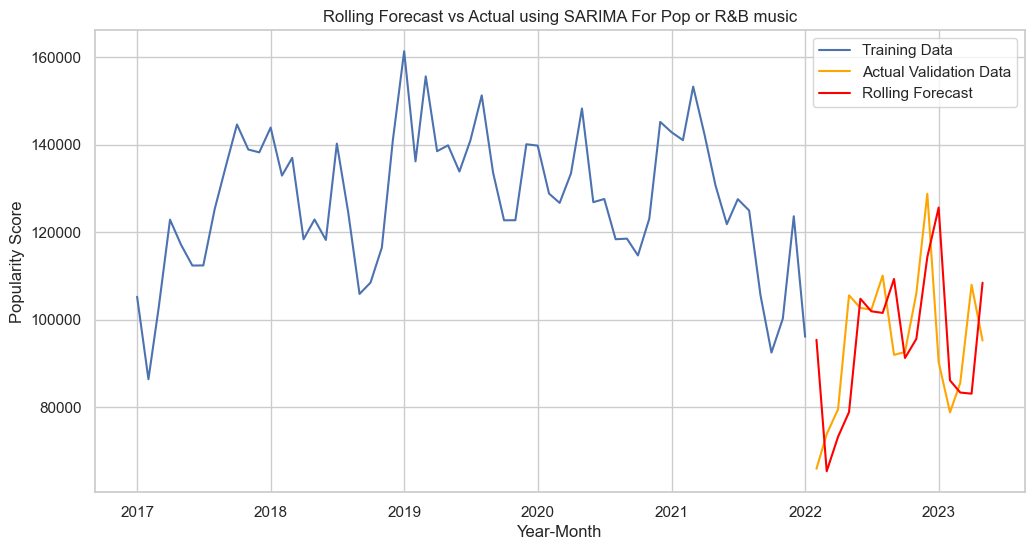

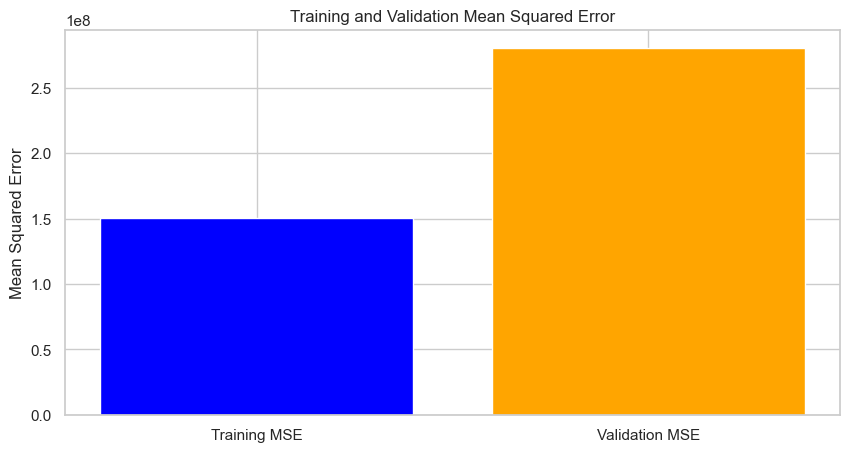

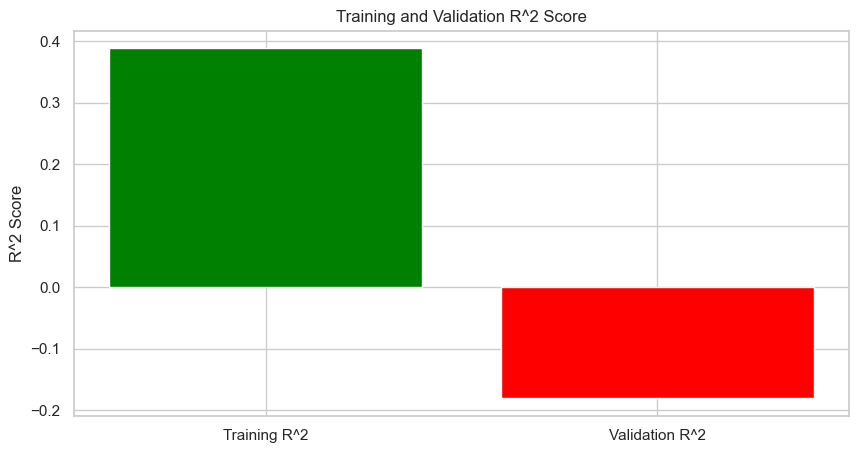

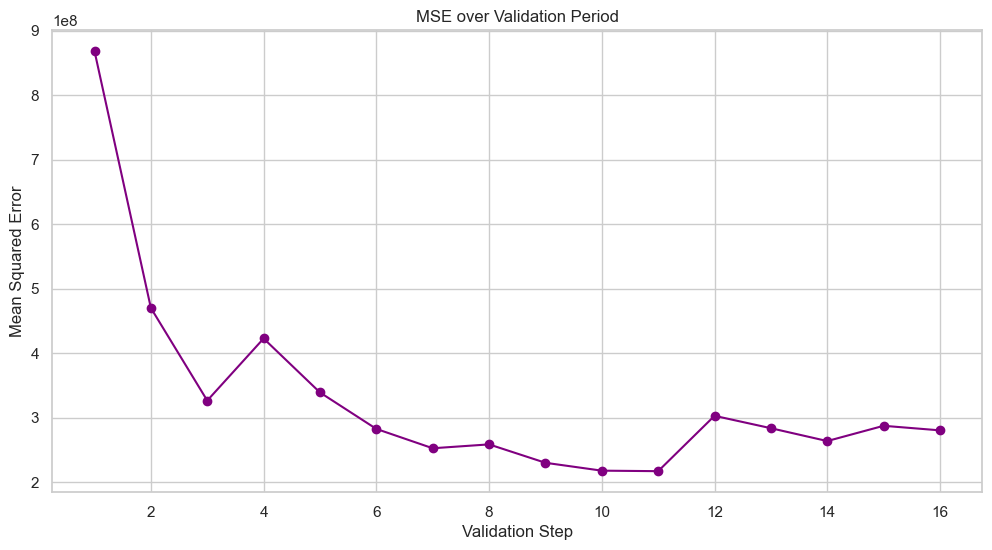

In [61]:
# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Select one genre's trend as an example for SARIMA prediction
genre_trend = genre_trends['Pop or R&B']

# Split the data into training and validation sets (80% training, 20% validation)
train_size = int(len(genre_trend) * 0.8)
train_data = genre_trend[:train_size]
validation_data = genre_trend[train_size:]

# Rolling forecast with SARIMA and automatic parameter tuning
history = list(train_data)  # Start with the training data
predictions = []
mse_values = []

# Use rolling forecast to predict each point in the validation set
for t in range(len(validation_data)):
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                      error_action='ignore', suppress_warnings=True, 
                      stepwise=True)
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    # Forecast the next point
    forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
    predictions.append(forecast)
    # Add the actual value to history for the next iteration
    history.append(validation_data.iloc[t])
    # Calculate MSE for the current prediction
    mse = mean_squared_error(validation_data[:t + 1], predictions)
    mse_values.append(mse)

# Calculate training error and validation error
train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
train_mse = mean_squared_error(train_data[1:], train_predictions)
validation_mse = mean_squared_error(validation_data, predictions)

train_r2 = r2_score(train_data[1:], train_predictions)
validation_r2 = r2_score(validation_data, predictions)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {validation_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Validation R^2 Score: {validation_r2}")

# Convert PeriodIndex to datetime for plotting
train_data.index = train_data.index.to_timestamp()
validation_data.index = validation_data.index.to_timestamp()

# Visualize the rolling forecast results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Actual Validation Data', color='orange')
plt.plot(validation_data.index, predictions, label='Rolling Forecast', color='red')
plt.title('Rolling Forecast vs Actual using SARIMA For Pop or R&B music')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

# Visualize training and validation errors
errors = [train_mse, validation_mse]
labels = ['Training MSE', 'Validation MSE']

plt.figure(figsize=(10, 5))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Validation Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize training and validation R^2 scores
r2_scores = [train_r2, validation_r2]
labels = ['Training R^2', 'Validation R^2']

plt.figure(figsize=(10, 5))
plt.bar(labels, r2_scores, color=['green', 'red'])
plt.title('Training and Validation R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

# Visualize MSE over the validation period
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='purple')
plt.title('MSE over Validation Period')
plt.xlabel('Validation Step')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### The training result of Rock or Alternative

Training Mean Squared Error: 196226938.09747848
Validation Mean Squared Error: 196818190.58182788
Training R^2 Score: 0.7129263760087708
Validation R^2 Score: -0.3633393924419597


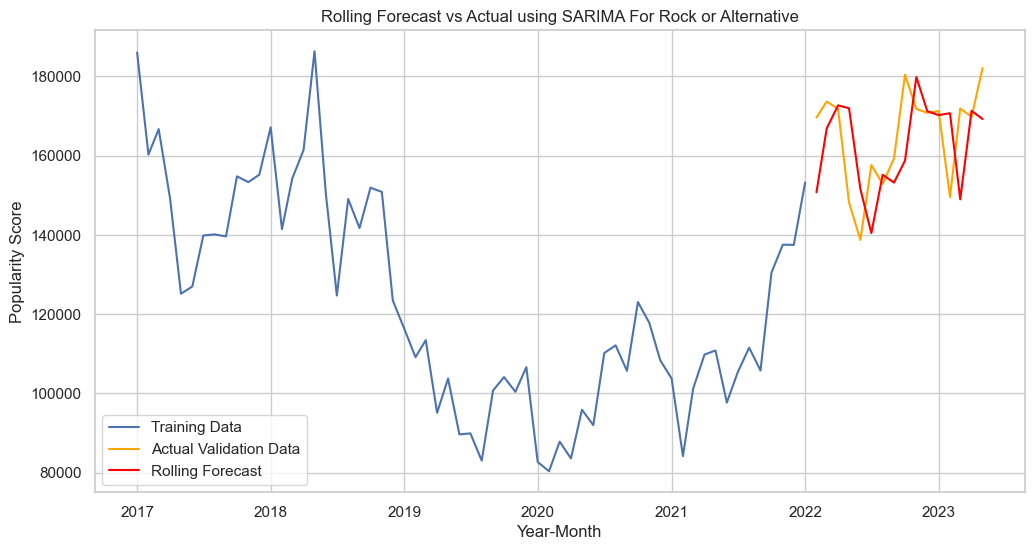

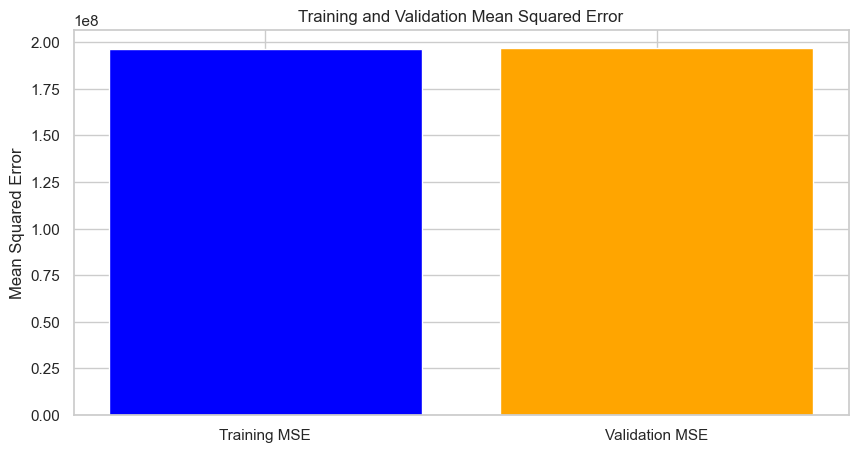

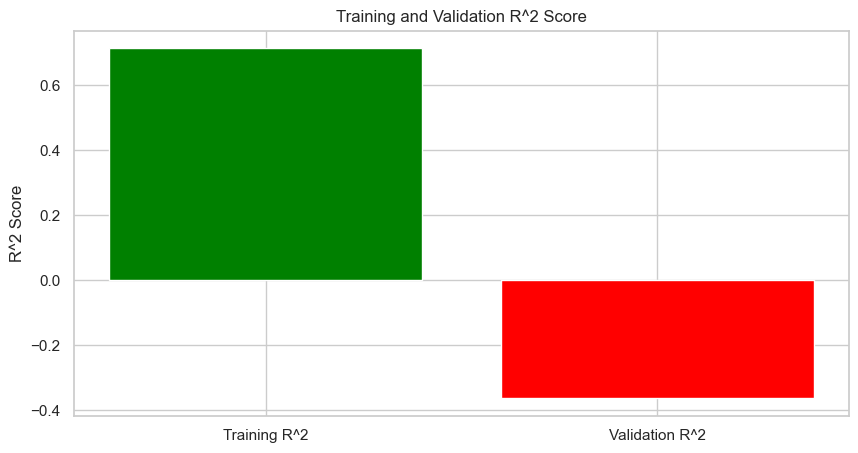

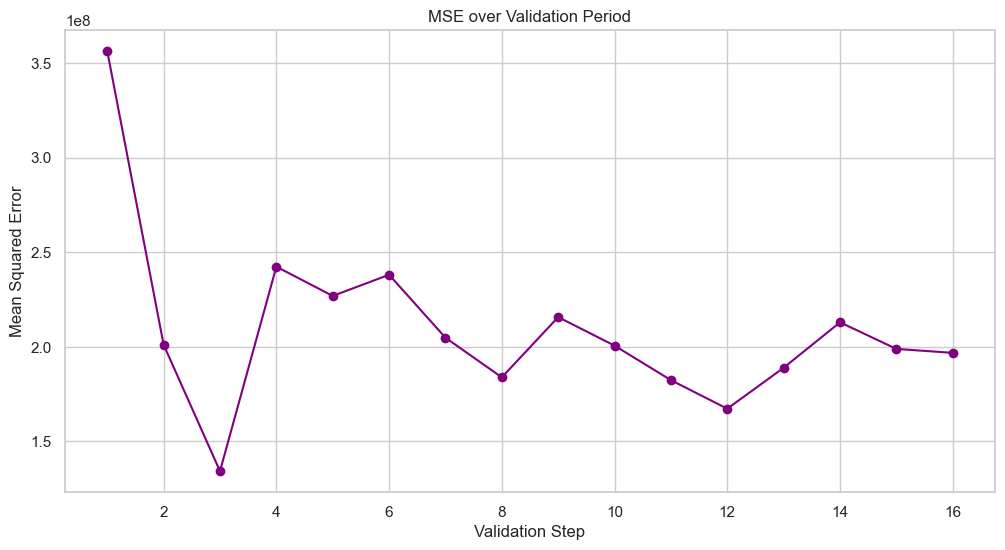

In [62]:
# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Select one genre's trend as an example for SARIMA prediction
genre_trend = genre_trends['Rock or Alternative']

# Split the data into training and validation sets (80% training, 20% validation)
train_size = int(len(genre_trend) * 0.8)
train_data = genre_trend[:train_size]
validation_data = genre_trend[train_size:]

# Rolling forecast with SARIMA and automatic parameter tuning
history = list(train_data)  # Start with the training data
predictions = []
mse_values = []

# Use rolling forecast to predict each point in the validation set
for t in range(len(validation_data)):
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                      error_action='ignore', suppress_warnings=True, 
                      stepwise=True)
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    # Forecast the next point
    forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
    predictions.append(forecast)
    # Add the actual value to history for the next iteration
    history.append(validation_data.iloc[t])
    # Calculate MSE for the current prediction
    mse = mean_squared_error(validation_data[:t + 1], predictions)
    mse_values.append(mse)

# Calculate training error and validation error
train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
train_mse = mean_squared_error(train_data[1:], train_predictions)
validation_mse = mean_squared_error(validation_data, predictions)

train_r2 = r2_score(train_data[1:], train_predictions)
validation_r2 = r2_score(validation_data, predictions)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Validation Mean Squared Error: {validation_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Validation R^2 Score: {validation_r2}")

# Convert PeriodIndex to datetime for plotting
train_data.index = train_data.index.to_timestamp()
validation_data.index = validation_data.index.to_timestamp()

# Visualize the rolling forecast results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(validation_data.index, validation_data, label='Actual Validation Data', color='orange')
plt.plot(validation_data.index, predictions, label='Rolling Forecast', color='red')
plt.title('Rolling Forecast vs Actual using SARIMA For Rock or Alternative')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()

# Visualize training and validation errors
errors = [train_mse, validation_mse]
labels = ['Training MSE', 'Validation MSE']

plt.figure(figsize=(10, 5))
plt.bar(labels, errors, color=['blue', 'orange'])
plt.title('Training and Validation Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualize training and validation R^2 scores
r2_scores = [train_r2, validation_r2]
labels = ['Training R^2', 'Validation R^2']

plt.figure(figsize=(10, 5))
plt.bar(labels, r2_scores, color=['green', 'red'])
plt.title('Training and Validation R^2 Score')
plt.ylabel('R^2 Score')
plt.show()

# Visualize MSE over the validation period
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-', color='purple')
plt.title('MSE over Validation Period')
plt.xlabel('Validation Step')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

## After multiple training trials, the best model parameters are used to train five schools

d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\L

Average Training Mean Squared Error: 181591962.59570628
Average Training Mean Absolute Error: 10422.917245502247
Average Training R^2 Score: 0.6105930150021159
Average Validation Mean Squared Error: 220026654.81512126
Average Validation Mean Absolute Error: 11392.073752053595
Average Validation R^2 Score: 0.08424704260545587


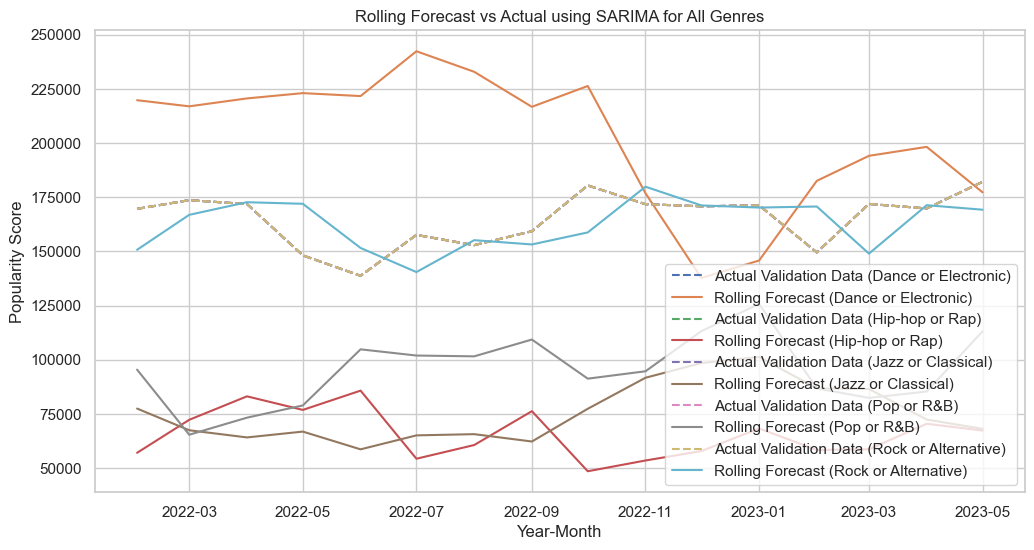

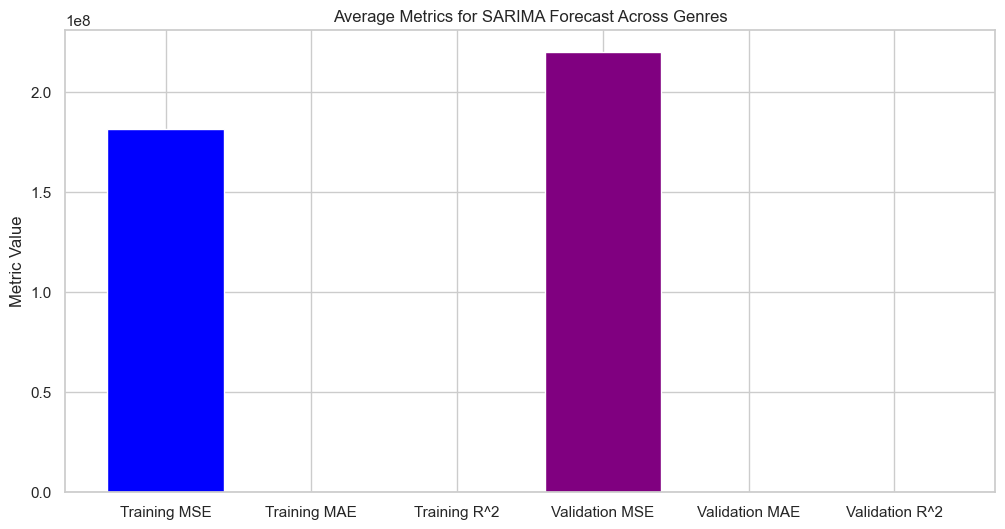

In [13]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Prepare the filtered data for SARIMA rolling forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Initialize metrics for all genres
total_train_mse = 0
total_train_mae = 0
total_train_r2 = 0
total_validation_mse = 0
total_validation_mae = 0
total_validation_r2 = 0
num_genres = len(genre_trends.columns)

# Step 2: Forecast each genre's trend
forecast_results = {}
all_predictions = {}

for genre in genre_trends.columns:
    # Get the time series for the current genre
    genre_trend = genre_trends[genre]
    
    # Split the data into training and validation sets (80% training, 20% validation)
    train_size = int(len(genre_trend) * 0.8)
    train_data = genre_trend[:train_size]
    validation_data = genre_trend[train_size:]
    
    # Rolling forecast with SARIMA and automatic parameter tuning
    history = list(train_data)  # Start with the training data
    predictions = []
    mse_values = []
    
    # Use rolling forecast to predict each point in the validation set
    for t in range(len(validation_data)):
        # Automatically determine the best SARIMA parameters using auto_arima
        model = auto_arima(history, seasonal=True, m=12, trace=False, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True, start_p=0, start_q=0, max_p=1, max_q=1, 
                          max_P=1, max_Q=1, max_order=3, alpha=0.05, information_criterion='aic')  # Limit model complexity
        # Fit the SARIMA model with the best parameters
        model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order, enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
        # Forecast the next point
        forecast = model_fit.get_forecast(steps=1).predicted_mean[0]
        predictions.append(forecast)
        # Add the actual value to history for the next iteration
        history.append(validation_data.iloc[t])
        # Calculate MSE for the current prediction
        mse = mean_squared_error(validation_data[:t + 1], predictions)
        mse_values.append(mse)
    
    # Store predictions for visualization
    all_predictions[genre] = predictions
    
    # Calculate training error and validation error
    train_predictions = model_fit.get_prediction(start=1, end=len(train_data) - 1).predicted_mean  # start from 1 to avoid ValueError for d=1
    train_mse = mean_squared_error(train_data[1:], train_predictions)
    train_mae = mean_absolute_error(train_data[1:], train_predictions)
    train_r2 = r2_score(train_data[1:], train_predictions)
    validation_mse = mean_squared_error(validation_data, predictions)
    validation_mae = mean_absolute_error(validation_data, predictions)
    validation_r2 = r2_score(validation_data, predictions)
    
    # Accumulate metrics for all genres
    total_train_mse += train_mse
    total_train_mae += train_mae
    total_train_r2 += train_r2
    total_validation_mse += validation_mse
    total_validation_mae += validation_mae
    total_validation_r2 += validation_r2
    
    # Store the forecast results
    forecast_results[genre] = predictions[-1]

# Calculate average metrics
avg_train_mse = total_train_mse / num_genres
avg_train_mae = total_train_mae / num_genres
avg_train_r2 = total_train_r2 / num_genres
avg_validation_mse = total_validation_mse / num_genres
avg_validation_mae = total_validation_mae / num_genres
avg_validation_r2 = total_validation_r2 / num_genres

print(f"Average Training Mean Squared Error: {avg_train_mse}")
print(f"Average Training Mean Absolute Error: {avg_train_mae}")
print(f"Average Training R^2 Score: {avg_train_r2}")
print(f"Average Validation Mean Squared Error: {avg_validation_mse}")
print(f"Average Validation Mean Absolute Error: {avg_validation_mae}")
print(f"Average Validation R^2 Score: {avg_validation_r2}")

# Step 3: Visualize the rolling forecast results for each genre
plt.figure(figsize=(12, 6))
for genre in genre_trends.columns:
    validation_index = genre_trend.index[train_size:]
    plt.plot(validation_index.to_timestamp(), validation_data, label=f'Actual Validation Data ({genre})', linestyle='--')
    plt.plot(validation_index.to_timestamp(), all_predictions[genre], label=f'Rolling Forecast ({genre})')

plt.title('Rolling Forecast vs Actual using SARIMA for All Genres')
plt.xlabel('Year-Month')
plt.ylabel('Popularity Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Visualize the average metrics
metrics = ['Training MSE', 'Training MAE', 'Training R^2', 'Validation MSE', 'Validation MAE', 'Validation R^2']
values = [avg_train_mse, avg_train_mae, avg_train_r2, avg_validation_mse, avg_validation_mae, avg_validation_r2]

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'purple', 'red', 'brown'])
plt.title('Average Metrics for SARIMA Forecast Across Genres')
plt.ylabel('Metric Value')
plt.grid(True)
plt.show()


## Model Results Evaluation

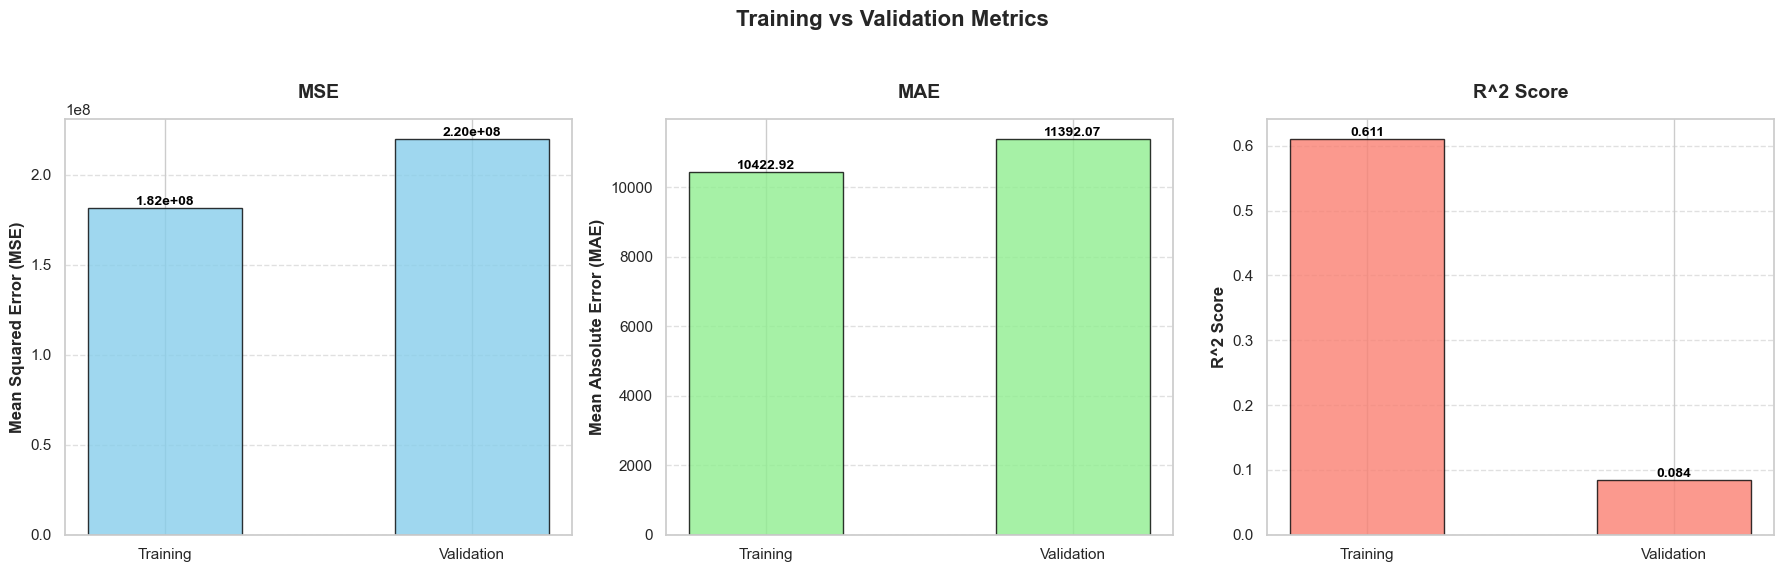

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation for different scales
training_metrics = [
    "Mean Squared Error (MSE)",
    "Mean Absolute Error (MAE)",
    "R^2 Score",
]
training_values = [
    181591962.59570628,  # Updated MSE
    10422.917245502247,  # Updated MAE
    0.6105930150021159,  # Updated R^2
]
validation_values = [
    220026654.81512126,  # Updated Validation MSE
    11392.073752053595,  # Updated Validation MAE
    0.08424704260545587, # Updated Validation R^2
]

# Create subplots with different y-axes for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Changed to 1 row and 3 columns

# Titles and colors for clarity
titles = ['MSE', 'MAE', 'R^2 Score']
colors = ['skyblue', 'lightgreen', 'salmon']
labels = ['Training', 'Validation']

# Plot each metric in a separate subplot with its own scale
for i, ax in enumerate(axes):
    # Data and bar plot
    x = np.arange(2)  # Training and Validation positions
    values = [training_values[i], validation_values[i]]
    bars = ax.bar(x, values, color=colors[i], alpha=0.8, edgecolor='black', width=0.5)  # Adjust bar width here
    
    # Add value annotations
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{height:.2e}' if i == 0 else f'{height:.2f}' if i == 1 else f'{height:.3f}',  # Adjust number formatting
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    # Set titles and labels
    ax.set_title(titles[i], fontsize=14, weight='bold', pad=15)
    ax.set_ylabel(training_metrics[i], fontsize=12, weight='bold')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

# Add a shared x-label (if necessary)
fig.suptitle("Training vs Validation Metrics", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Visualize genre predictions, genre correlations, and more

d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
d:\Program Files\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


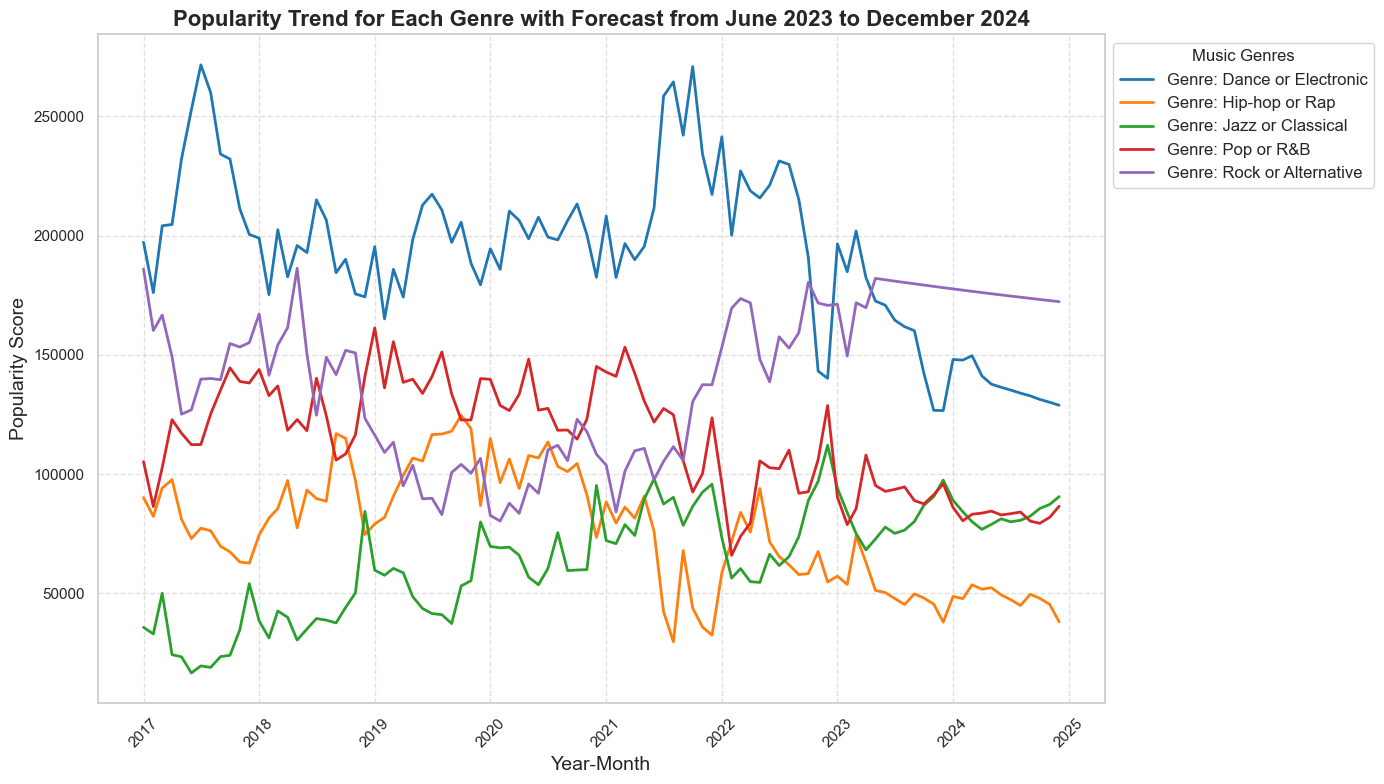

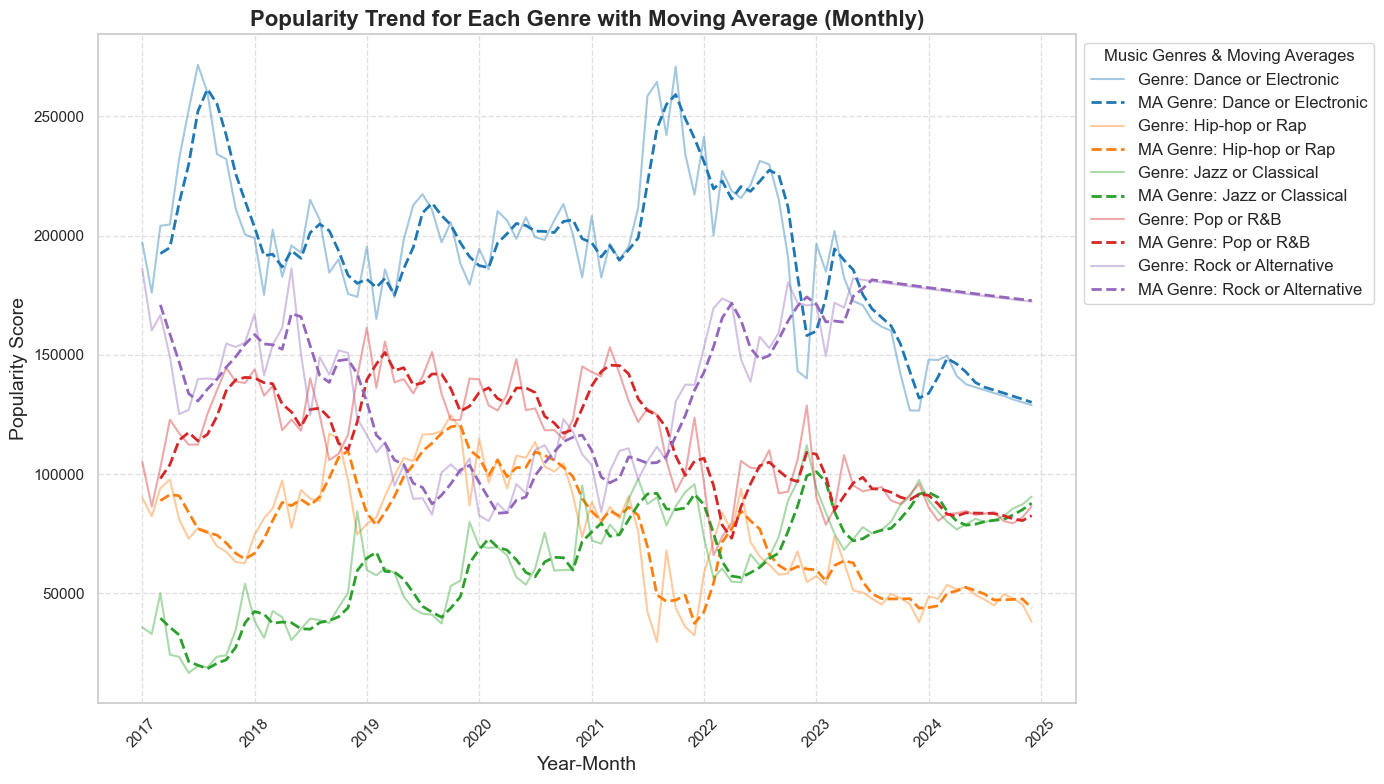

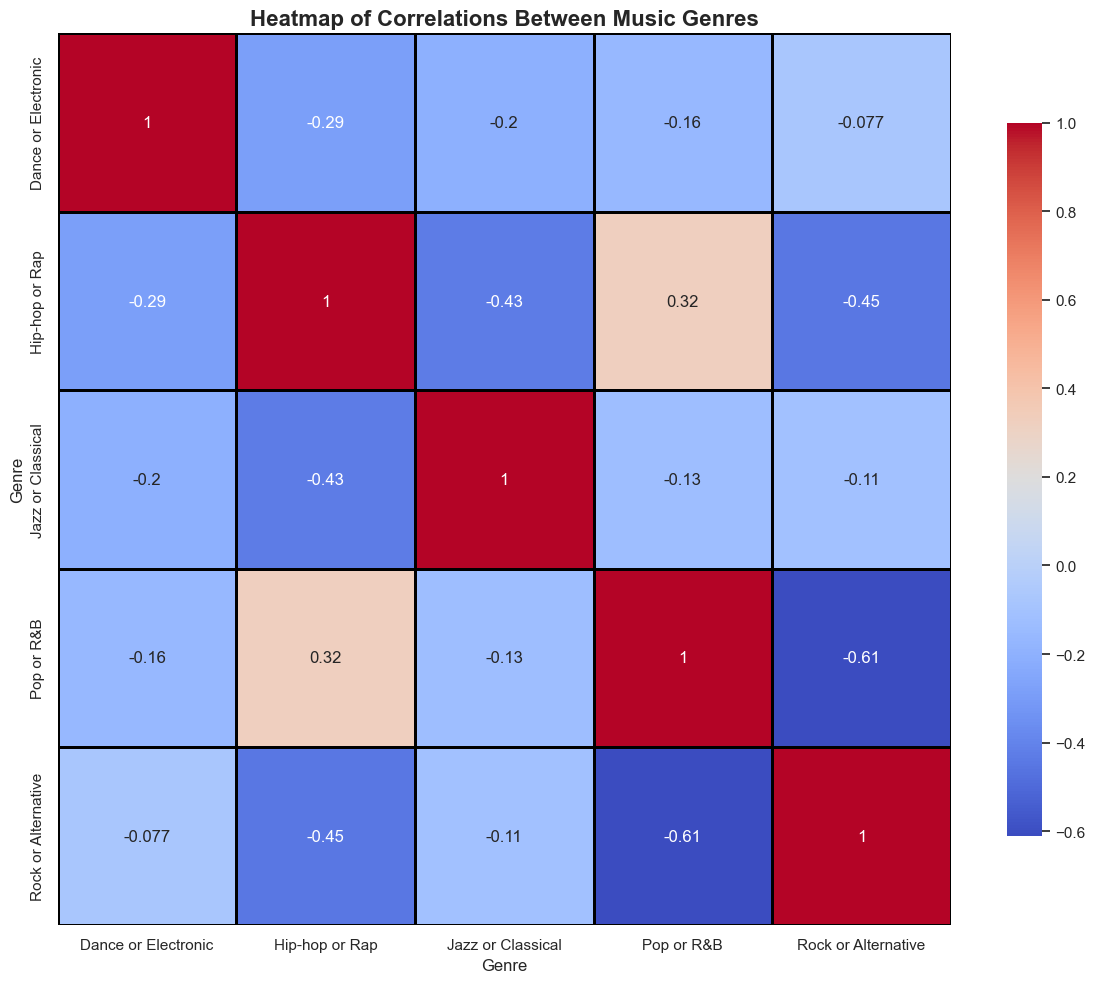

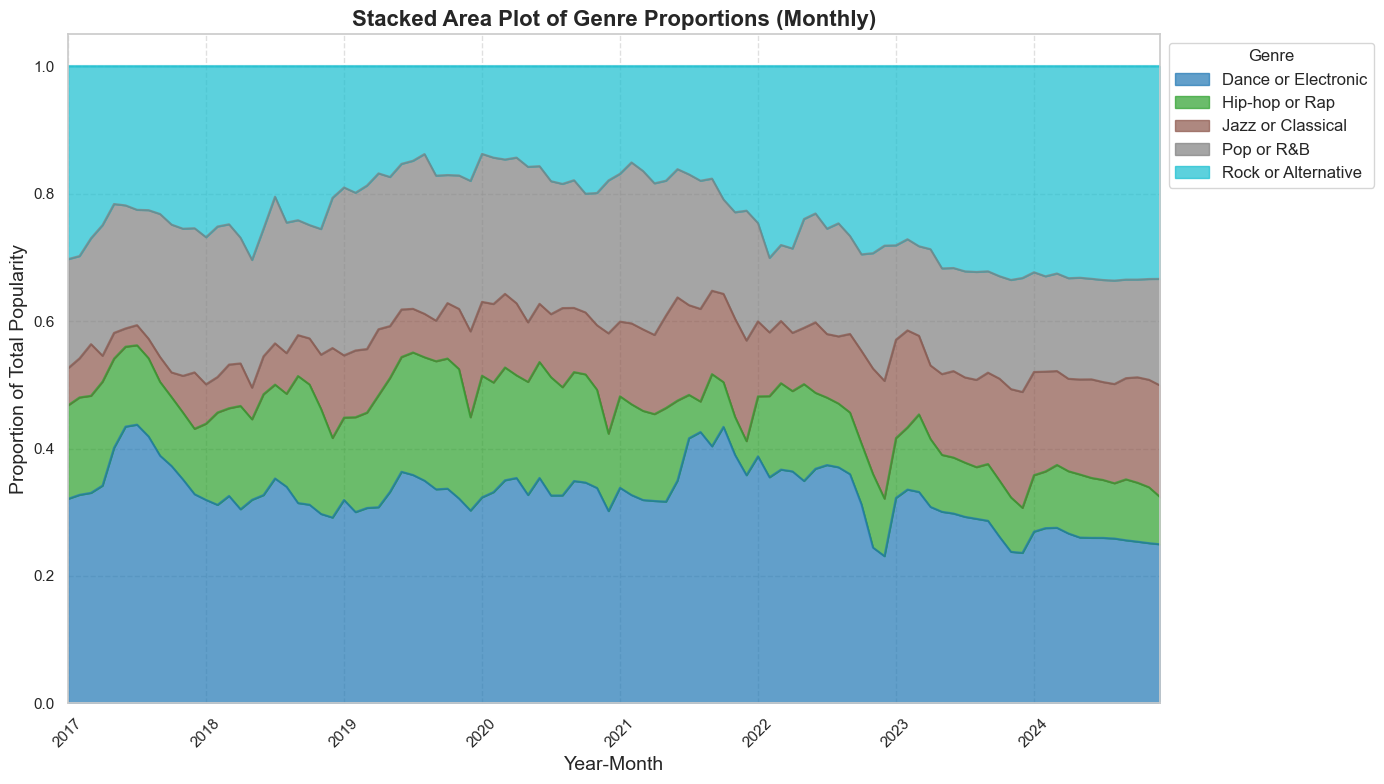

In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

# Step 1: Prepare the filtered data for SARIMA forecast
# Group by 'Year-Month' and 'Genre' to get the popularity trend of each genre
df.loc[:, 'Year-Month'] = pd.to_datetime(df['Date'], dayfirst=True).dt.to_period('M')
genre_trends = df.groupby(['Year-Month', 'Genre'])['Points (Total)'].sum().unstack().fillna(0)

# Step 2: Forecast each genre's trend from June 2023 to December 2024
forecast_results = {}
forecast_periods = 19  # Predict from June 2023 to December 2024

for genre in genre_trends.columns:
    # Get the time series for the current genre
    genre_trend = genre_trends[genre]
    
    # Use the entire dataset as training data
    history = list(genre_trend)
    
    # Automatically determine the best SARIMA parameters using auto_arima
    model = auto_arima(history, seasonal=True, m=12, trace=False, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True, start_p=0, start_q=0, max_p=1, max_q=1, 
                          max_P=1, max_Q=1, max_order=3, alpha=0.05, information_criterion='aic')  # Limit model complexity
    # Fit the SARIMA model with the best parameters
    model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order, enforce_stationarity=True, enforce_invertibility=True).fit(disp=False)
    
    # Rolling forecast for the next 19 months (from June 2023 to December 2024)
    predictions = []
    for i in range(forecast_periods):
        forecast = model_fit.forecast(steps=1)[0]
        predictions.append(forecast)
        history.append(forecast)
        model_fit = SARIMAX(history, order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    
    forecast_results[genre] = predictions

# Step 3: Add the forecast to the original data for visualization
forecast_index = pd.period_range(start='2023-06', periods=forecast_periods, freq='M')
forecast_df = pd.DataFrame(forecast_results, index=forecast_index)
full_trends = pd.concat([genre_trends, forecast_df])
full_trends.index = full_trends.index.to_timestamp()

# Step 4: Visualize the results
plt.figure(figsize=(14, 8))

colors = sns.color_palette("tab10", n_colors=len(genre_trends.columns))

# Plot the trends for each genre
for i, genre in enumerate(genre_trends.columns):
    plt.plot(full_trends.index, full_trends[genre], label=f'Genre: {genre}', color=colors[i], linewidth=2)

plt.title('Popularity Trend for Each Genre with Forecast from June 2023 to December 2024', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Popularity Score', fontsize=14)
plt.xticks(rotation=45)

plt.legend(title='Music Genres', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 5: Add Moving Average Line to Forecast Plot
plt.figure(figsize=(14, 8))
window_size = 3  # Moving average window size (3 months)

for i, genre in enumerate(genre_trends.columns):
    plt.plot(full_trends.index, full_trends[genre], label=f'Genre: {genre}', color=colors[i], alpha=0.4, linewidth=1.5)
    plt.plot(full_trends.index, full_trends[genre].rolling(window=window_size).mean(), linestyle='--', color=colors[i], linewidth=2, label=f'MA Genre: {genre}')

plt.title('Popularity Trend for Each Genre with Moving Average (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Popularity Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Music Genres & Moving Averages', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 6: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = genre_trends.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title('Heatmap of Correlations Between Music Genres', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Step 7: Stacked Area Plot for Genre Proportions
plt.figure(figsize=(14, 8))
full_trends_normalized = full_trends.div(full_trends.sum(axis=1), axis=0)  # Normalize to get proportions
full_trends_normalized.plot.area(ax=plt.gca(), cmap='tab10', alpha=0.7)

plt.title('Stacked Area Plot of Genre Proportions (Monthly)', fontsize=16, fontweight='bold')
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Proportion of Total Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1), frameon=True, fontsize=12)
plt.tight_layout()
plt.show()